# Regressão Linear Simples

## Importando as libs

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
# Para sobreescrever o estilo padrao do matplotlib pelo do Seaborn
import seaborn as sns
sns.set()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


## Carregando os dados

Esta base de dados contém dados de alunos correspondentes às habilidades matemáticas, leitura, crítica e nota de um teste chamado GAP.

In [2]:
data = pd.read_csv('dataset/regressao_linear_simples.csv')

In [3]:
data

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83
...,...,...
79,1936,3.71
80,1810,3.71
81,1987,3.73
82,1962,3.76


In [4]:
data.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


## Separando variável dependente (variável de saída) das independentes (variáveis de entrada)

- SAT é considerado um dos melhores estimadores de capacidade, capacidade intelectual, em média, se você se saiu bem em seu teste, você vai se sair bem na faculdade e no local de trabalho.

In [5]:
y = data ['GPA']  # Nota: Great point average (at graduation from university)
x1 = data ['SAT'] # Habilidades: Critical Reading + Mathematics + Writing

## Explorando os dados

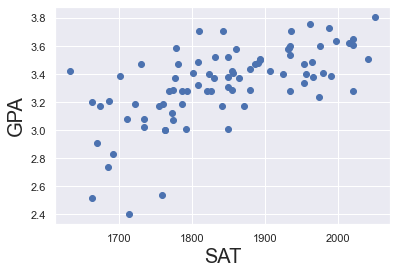

In [6]:
plt.scatter(x1,y)
# Nome dos eixos
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)

plt.show()

## Regression itself

In [7]:
x = sm.add_constant(x1)

In [8]:
# Adiciona uma constante. Adiciona uma nova coluna (de comprimento igual a x), que consiste apenas em 1s
x = sm.add_constant(x1)
# Ajusta o modelo, de acordo com o método OLS (mínimos quadrados ordinários) com uma variável dependente y e um x independente
results = sm.OLS(y,x).fit()
# Imprime um resumo da regressão. Esse é um dos pontos fortes dos modelos estatísticos -> os resumos
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Sat, 13 Jan 2024   Prob (F-statistic):           7.20e-11
Time:                        15:38:18   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
SAT            0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Interpretação das tabelas

- Tabela com resumo do modelo
- Tabela de coeficientes
    - mostra o intercept (coeficiente de interceptação, ou a contante)
    - números necessários para definir a equação de regressão
    - para este problema a equação ficaria:
        - $ GPA = 0.275 + 0.0017 * SAT $
    - std err: (desvio padrão do erro) mostra a precisão da previsão para cada variável, quanto menor, melhor a estimativa
    - Hipótese Nulo define que o coeficiente é igual a zero. Se um coeficiente é zero para a interceptação ser zero, ou seja, a linha cruza o eixo y na origem se Beta 1 for zero, então zero vezes X será sempre 0 para qualquer X:
      - Essa variável é útil???
- Tabela de testes adicionais

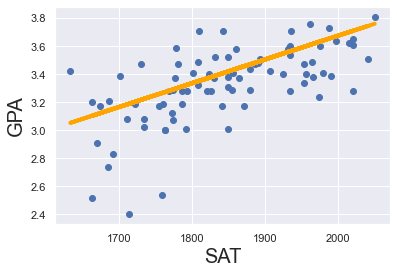

In [9]:
# Define a scatter plot
plt.scatter(x1,y)
# Define a equação de regressão, é possível plotar o gráfico
yhat = 0.0017*x1 + 0.275

fig = plt.plot(x1,yhat, lw=4, c='orange', label ='regression line')
# Rótulo dos eixos
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

### Exemplo de Regressão simples para identificar o preço de acordo com o tamanho do imóvel

#### Carregando os dados

In [10]:
data = pd.read_csv('dataset/real_estate_price_size.csv')

In [11]:
data.head()

,price,size
0,234314.144,643.09
1,228581.528,656.22
2,281626.336,487.29
3,401255.608,1504.75
4,458674.256,1275.46


In [16]:
y = data ['price']  # preço do imóvel
x1 = data ['size'] # tamanho do imóvel

In [13]:
x = sm.add_constant(x1)

#### Modelagem

In [14]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     285.9
Date:                Sat, 13 Jan 2024   Prob (F-statistic):           8.13e-31
Time:                        15:38:18   Log-Likelihood:                -1198.3
No. Observations:                 100   AIC:                             2401.
Df Residuals:                      98   BIC:                             2406.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.019e+05   1.19e+04      8.550      0.000    7.83e+04    1.26e+05
size         223.1787     13.199     16.909      0.000     196.986     249.371
==============================================================================
Omnibus:                        6.262   Durbin-Watson:                   2.267
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                2.938
Skew:                           0.117   Prob(JB):                        0.230
Kurtosis:                       2.194   Cond. No.                     2.75e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Plot

Text(0, 0.5, 'GPA')

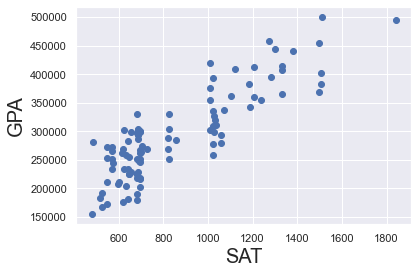

In [20]:
plt.scatter(x1,y)
#yhat = 0.0017*x1 + 0.275
#fig = plt.plot(x, lw=4, c='orange', label='regressao linear')
plt.xlabel('SAT',fontsize=20)
plt.ylabel('GPA',fontsize=20)

### Decomposição da Variabilidade

-  Sum of Squares Total (SST ou TSS): dispersão das variáveis observadas em torno da média.
    - $\sum_{i=1}^{n} (y_i - \bar y )^2$
- Sum of Squares Regression (SSR): significa que seu modelo de regressão captura toda a variabilidade observada e é perfeito.
    - $\sum_{i=1}^{n} (\hat y_i - \bar y )^2$
- Sum of Squares Error (SSE ou RSS): Geralmente, queremos minimizar o erro. Quanto menor o erro, melhor o poder de estimativa da regressão. RSS ou soma residual dos quadrados residuais como nos restantes ou inexplicáveis.
    - $\sum_{i=1}^{n}  e_{i}^{2}$
- SST = SSR + SSE

![Alt ou título da imagem](images/sst_ssr_sse.png)

### Mínimos Quadrados Ordinários (Ordinary Least Squares - OLS)

Mínimos quadrados ordinários é o método mais comum para estimar a equação de regressão linear. Mínimos Quadrados representa o erro de mínimos quadrados ou SAAC. Um erro menor resulta em um melhor poder explicativo do modelo de regressão. Portanto, este método visa encontrar a linha que minimiza a soma dos erros ao quadrado.

#### R-Squared

- R-Squared = É igual à variabilidade explicada pela regressão dividida pela variabilidade total.

- R-Squared é uma medida estatística em um modelo de regressão que determina a proporção de variância na variável dependente que pode ser explicada pela variável independente. Em outras palavras, R-quadrado mostra quão bem o modelo de regressão se ajustam aos dados (a qualidade do ajuste).

- É uma medida relativa e utiliza valores que variam de 0 a 1. Quanto maior mais os dados se ajustam ao modelo de regressão.

- Dependendo da área que é aplicada, os valores que são considerados podem variar. Por exemplo, em áreas como física e química, os cientistas geralmente procuram regressões com R ao quadrado entre 0. 7 e zero ponto noventa e nove. No entanto, nas ciências sociais, como economia, finanças e psicologia e R ao quadrado de 0. 2 ou 20% da variabilidade explicada pelo modelo pode ser fantástica.

Variabilidade Total =  Variabilidade explicada + Variabilidade inexplicada